### Exploration

- what can we say about the data now that we have it in a workable condition?
- Steps:

1. Univariate, 
- visualizations (distribution)
2. Bivariate vizzzes(comparative) and statistical testing
3. Multivariate Exploration
- vizzes(comparative) stats tesing clues for feature engineering


In [ ]:
# what do we want to know about the data?  
# can it be expressed within hypothessis testing framework?

In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env
import acquire as acq
import prepare as prp
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [5]:
df = acq.get_titanic_data('titanic_db')

In [6]:
df = prp.prep_titanic(df)

In [7]:
train_titanic,validate_titanic,test_titanic = prp.split_data(df,['survived'])
train_titanic.shape

(498, 12)

In [9]:
train_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
542,0,3,female,11.000000,4,2,31.2750,Southampton,0,0,0,1
457,1,1,female,29.699118,1,0,51.8625,Southampton,0,0,0,1
205,0,3,female,2.000000,0,1,10.4625,Southampton,0,0,0,1
208,1,3,female,16.000000,0,0,7.7500,Queenstown,1,0,1,0
485,0,3,female,29.699118,3,1,25.4667,Southampton,0,0,0,1


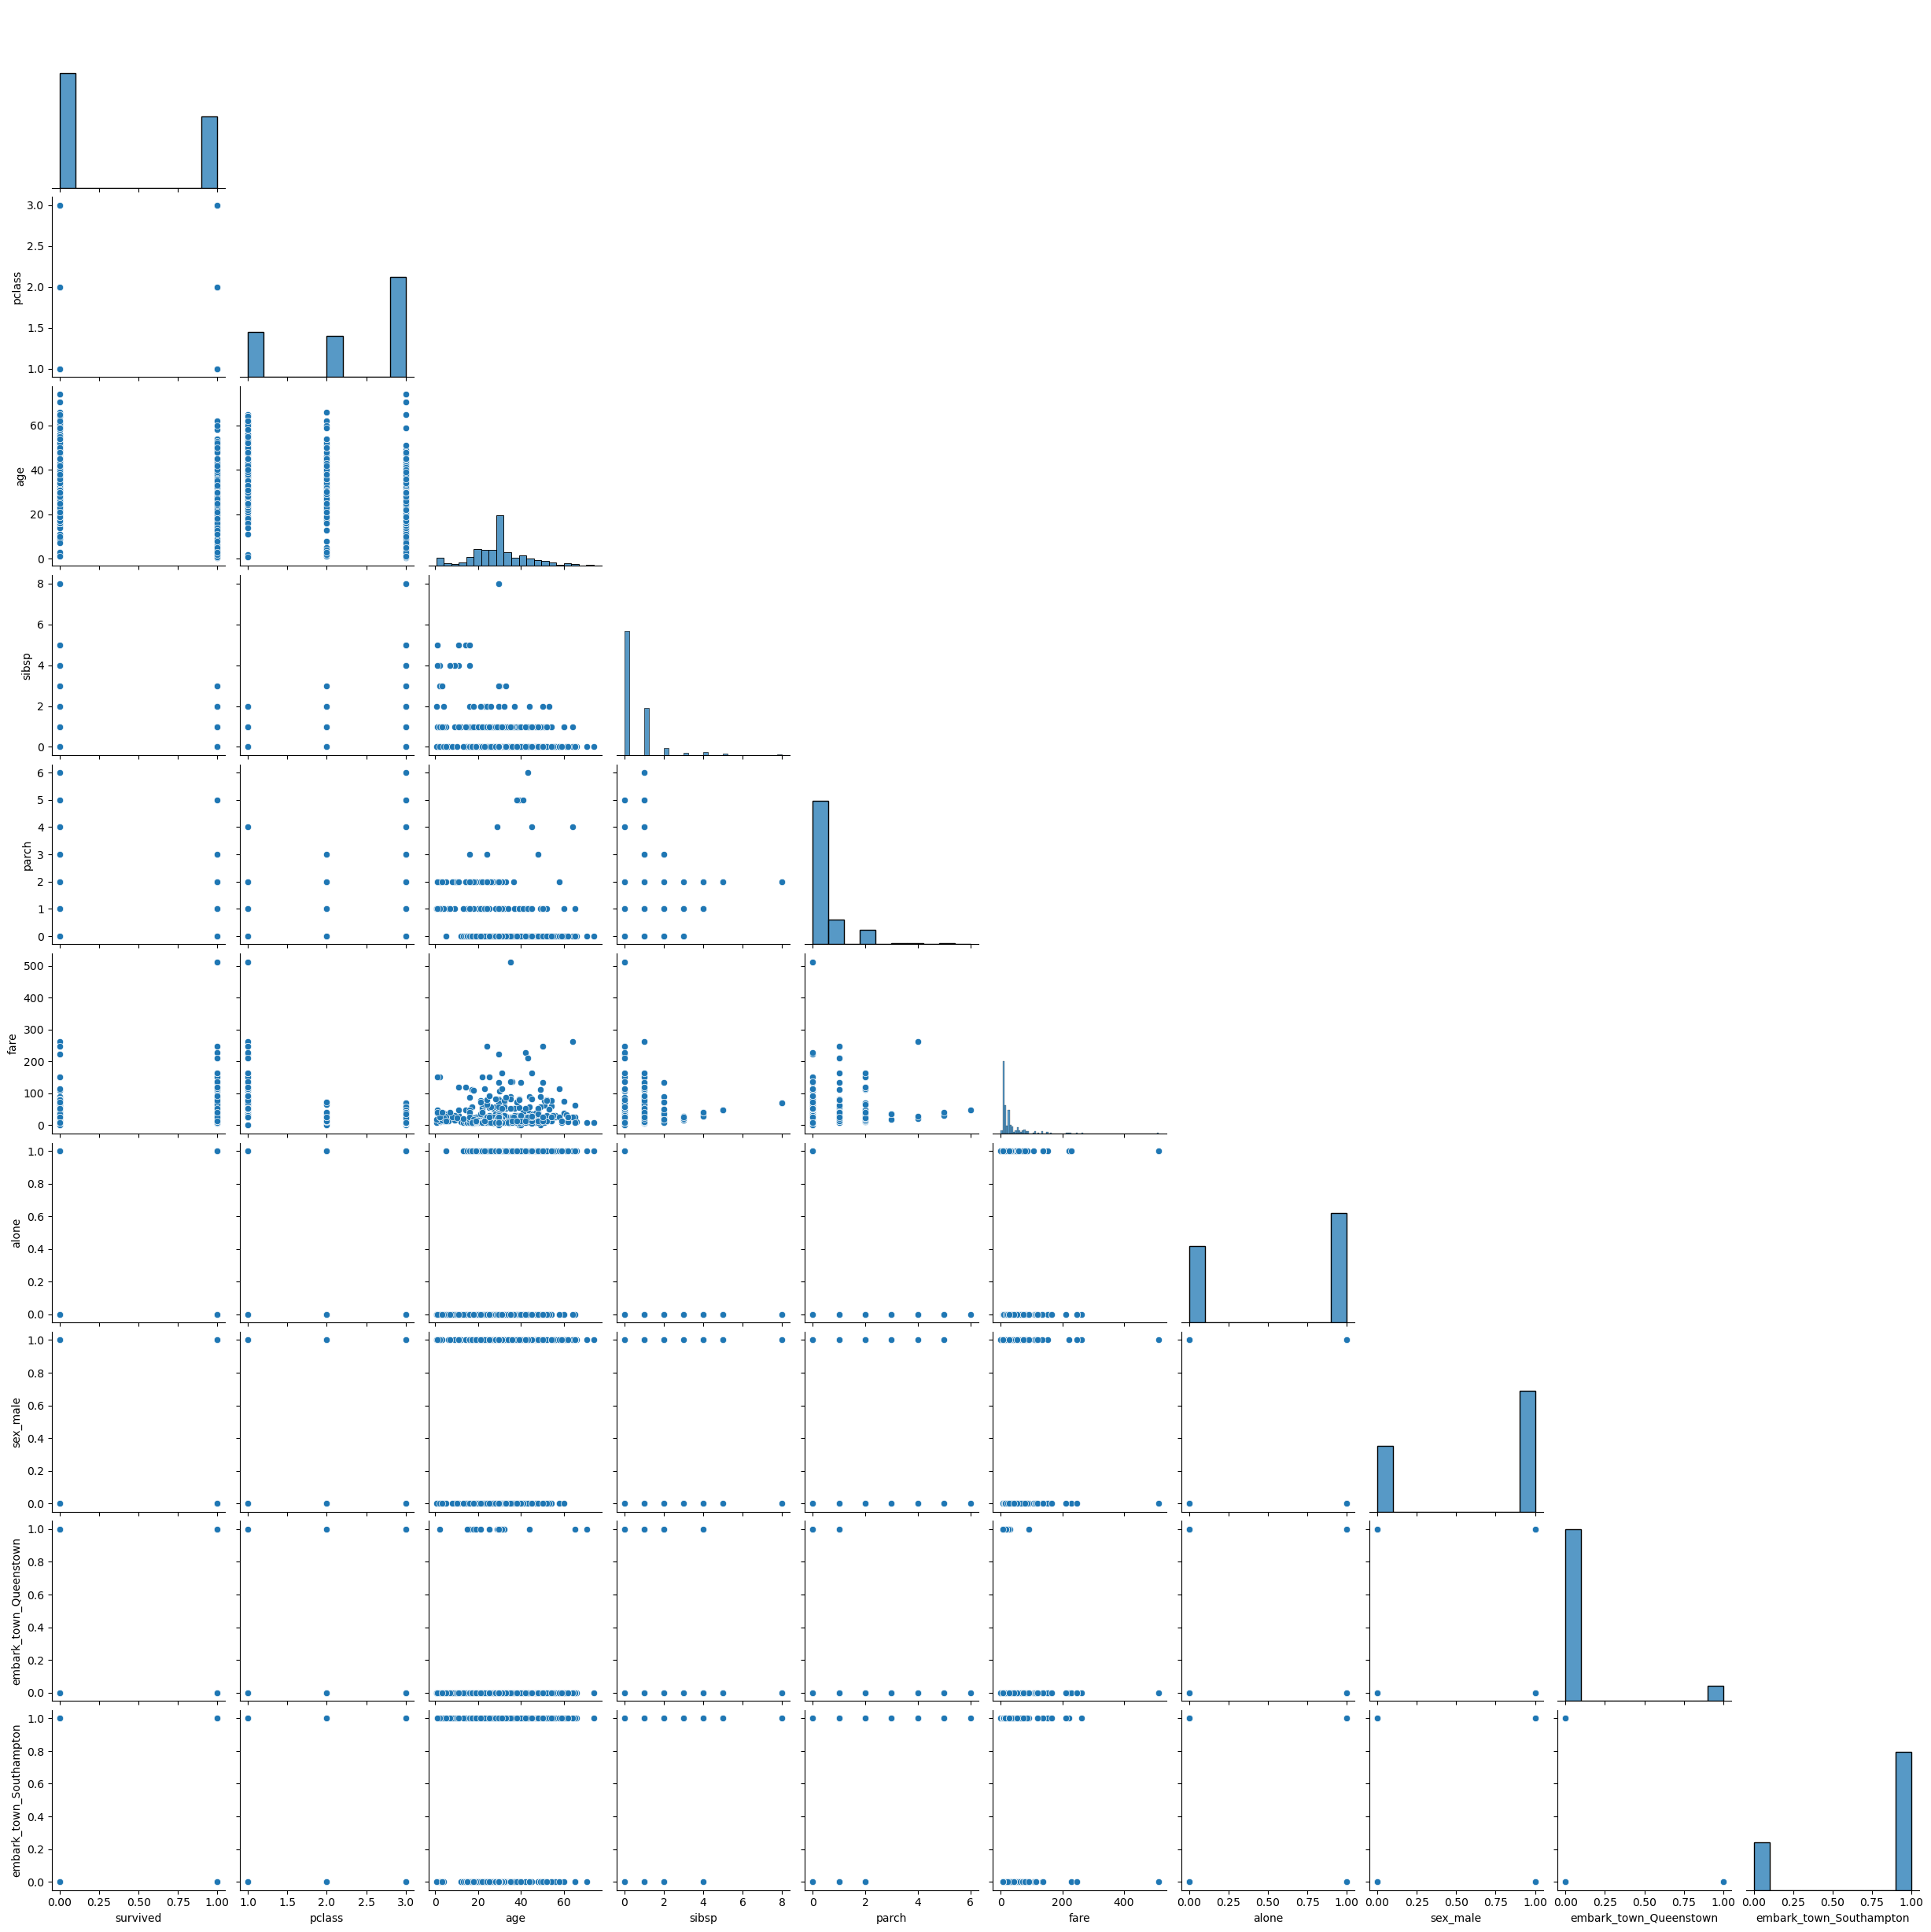

In [10]:
sns.pairplot(train_titanic,corner=True)
plt.show()

In [11]:
train_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [14]:
cat_cols,num_cols = [],[]
for col in train_titanic.columns:
    if train_titanic[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train_titanic[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [15]:
cat_cols

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [16]:
num_cols

['age', 'fare']

In [17]:
#remove the 1-hot encoded embark town
cat_cols = cat_cols[:-2]
cat_cols

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male']

In [19]:
cat_cols + num_cols

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male',
 'age',
 'fare']

In [18]:
# wrap all cats and nums in a totallist
explore_cols = cat_cols + num_cols

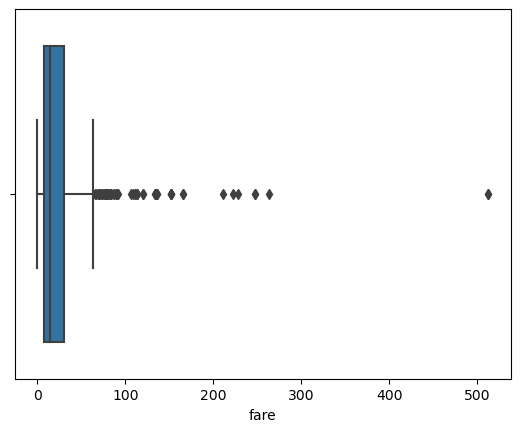

In [20]:
# univariate exploration for a breakdown of spread/distro
sns.boxplot(data=train_titanic,x='fare')
plt.show()

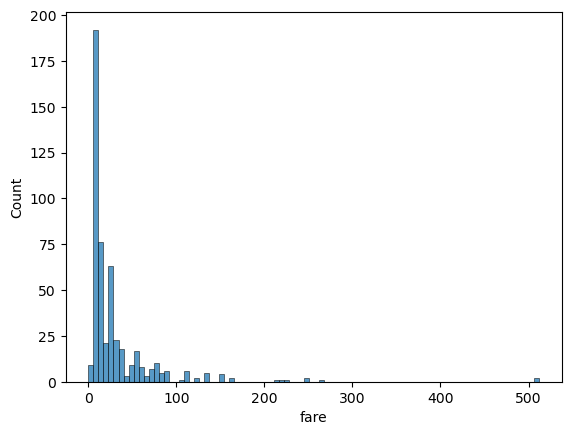

In [21]:
sns.histplot(data=train_titanic,x='fare')
plt.show()

In [22]:
train_titanic.fare.describe()

count    498.000000
mean      31.113135
std       48.143834
min        0.000000
25%        7.903100
50%       14.454200
75%       30.646850
max      512.329200
Name: fare, dtype: float64

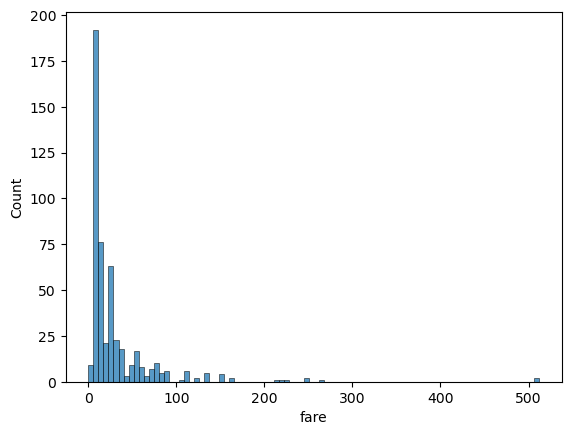

In [26]:
# for cats:
sns.histplot(data=train_titanic, x='fare')
plt.show()

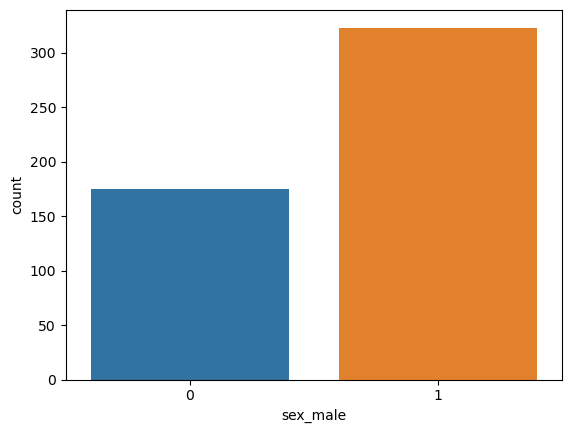

In [25]:
sns.countplot(data=train_titanic,x='sex_male')
plt.show()

In [ ]:
pd.concat([train_titanic.sex_male])

Univariate assess feature survived:


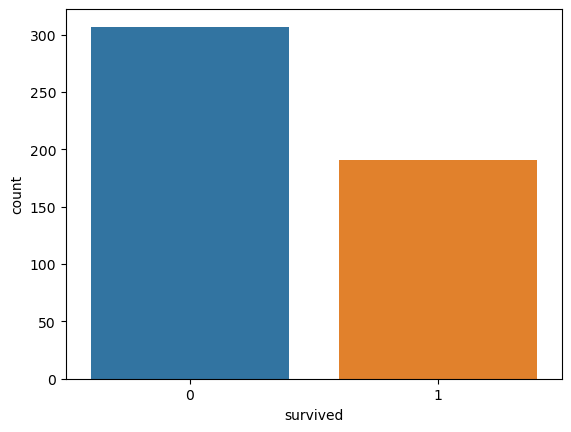

   survived  survived
0       307  0.616466
1       191  0.383534
Univariate assess feature pclass:


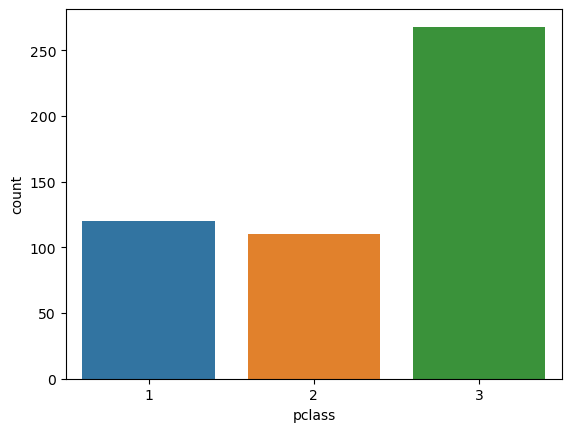

   pclass    pclass
3     268  0.538153
1     120  0.240964
2     110  0.220884
Univariate assess feature sex:


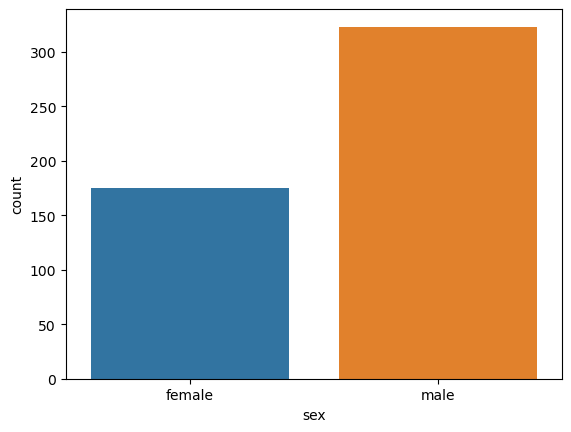

        sex       sex
male    323  0.648594
female  175  0.351406
Univariate assess feature sibsp:


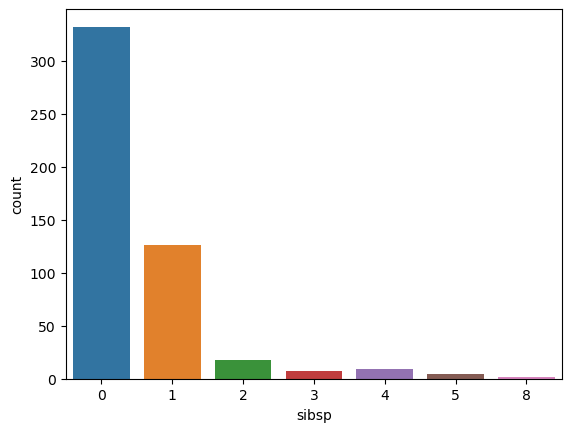

   sibsp     sibsp
0    332  0.666667
1    126  0.253012
2     18  0.036145
4      9  0.018072
3      7  0.014056
5      4  0.008032
8      2  0.004016
Univariate assess feature parch:


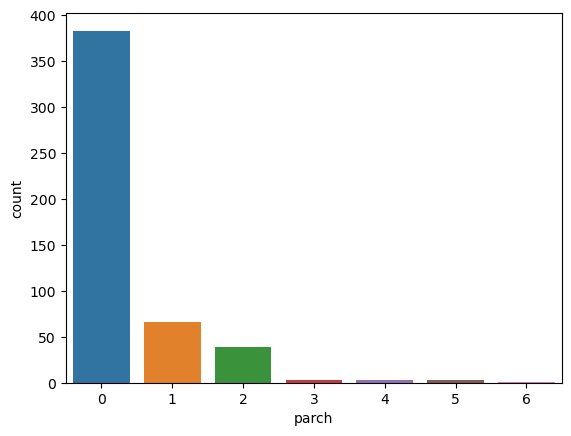

   parch     parch
0    383  0.769076
1     66  0.132530
2     39  0.078313
5      3  0.006024
3      3  0.006024
4      3  0.006024
6      1  0.002008
Univariate assess feature embark_town:


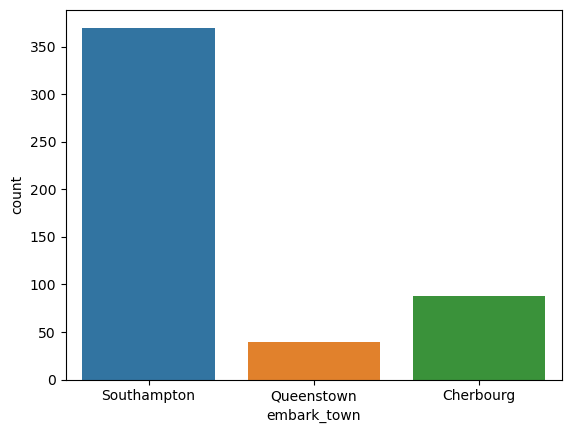

             embark_town  embark_town
Southampton          370     0.742972
Cherbourg             88     0.176707
Queenstown            40     0.080321
Univariate assess feature alone:


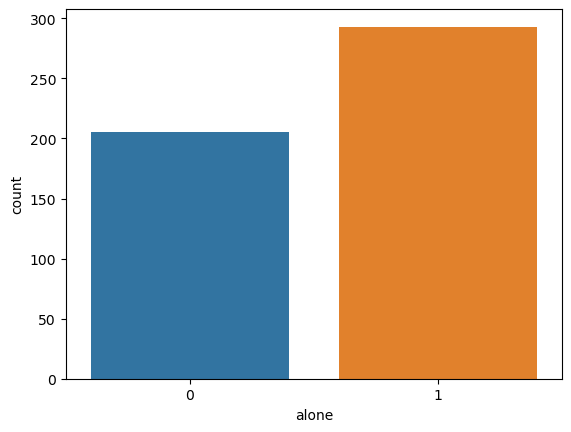

   alone     alone
1    293  0.588353
0    205  0.411647
Univariate assess feature sex_male:


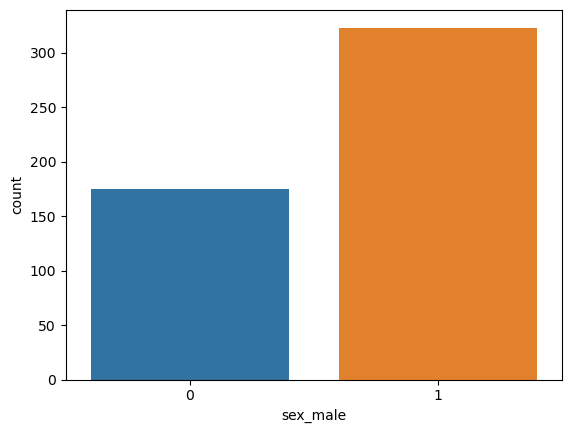

   sex_male  sex_male
1       323  0.648594
0       175  0.351406


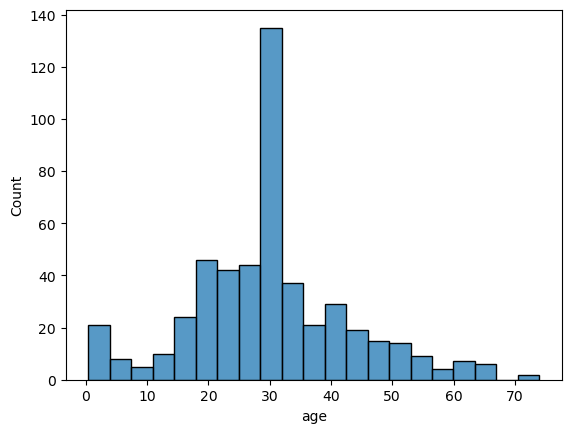

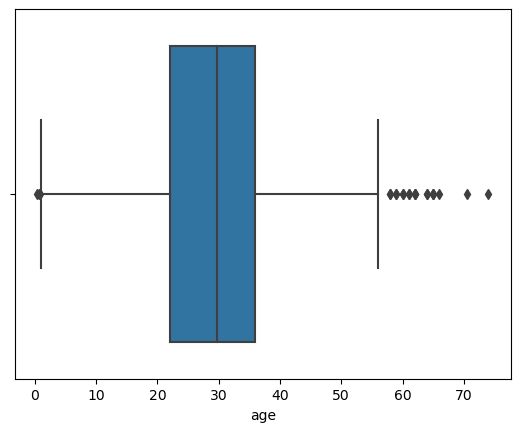

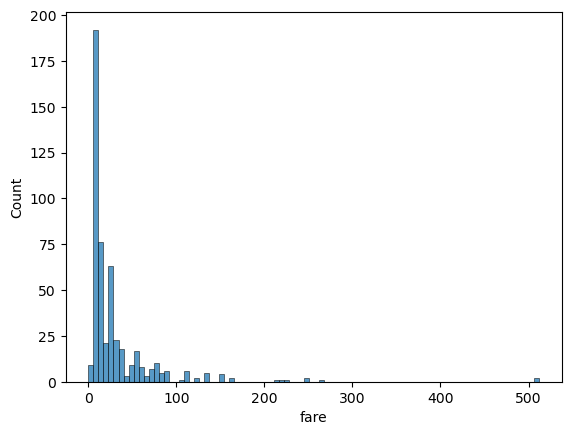

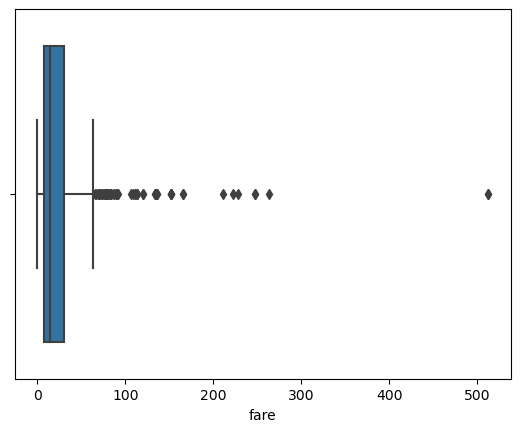

In [32]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assess feature {col}:')
        sns.countplot(data=train_titanic,x=col)
        plt.show()
        print(
        pd.concat([train_titanic[col].value_counts(),
                   train_titanic[col].value_counts(normalize=True)],
                  axis=1))
    else:
        sns.histplot(data=train_titanic, x=col)
        plt.show()
        sns.boxplot(data=train_titanic, x=col)
        plt.show()
        train_titanic[col].describe()

In [33]:
# # Initial takeaways from univariate analysis:
# a fairly normal dist. with age,
# not so much with fare
# for cats, we may want combine some of the like sipsb or parch to reduce number of categories-feature reduction


In [ ]:
# what knd of viz do we want to create based on what type of conclusion we want to draw...
# in this case of analytical survoval of titanic, this will frame much of our analysis  and interactions 
# of target.  

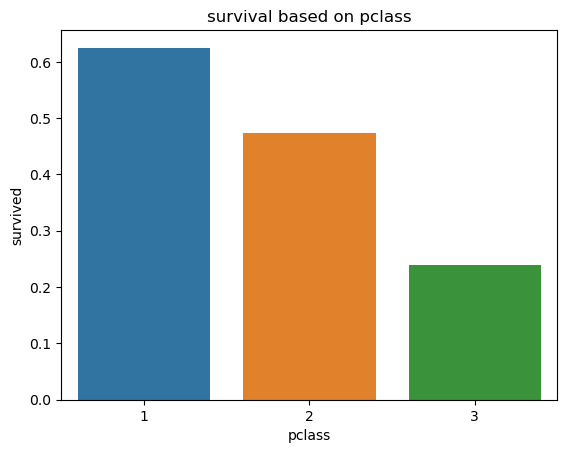

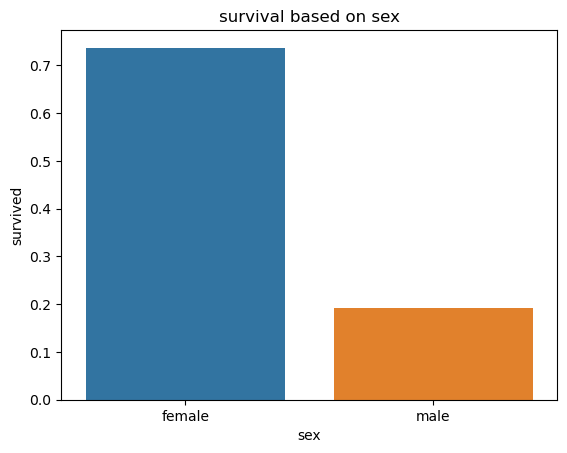

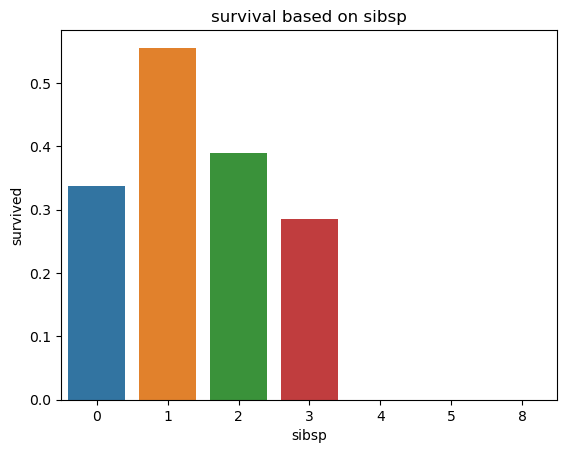

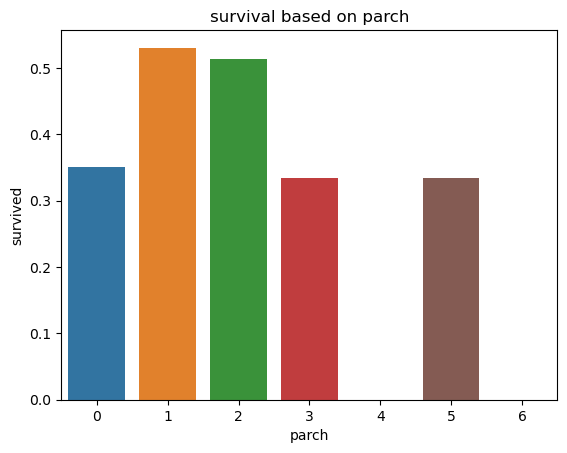

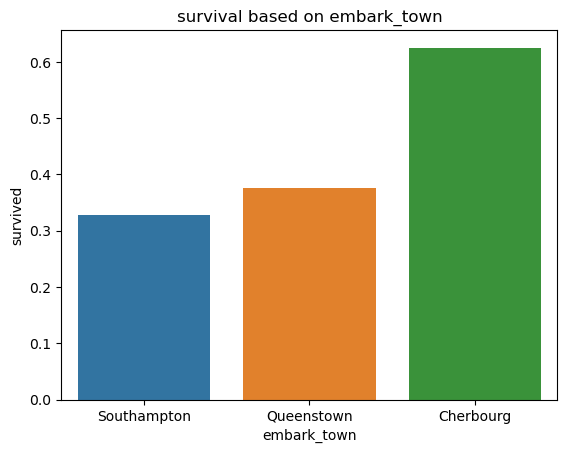

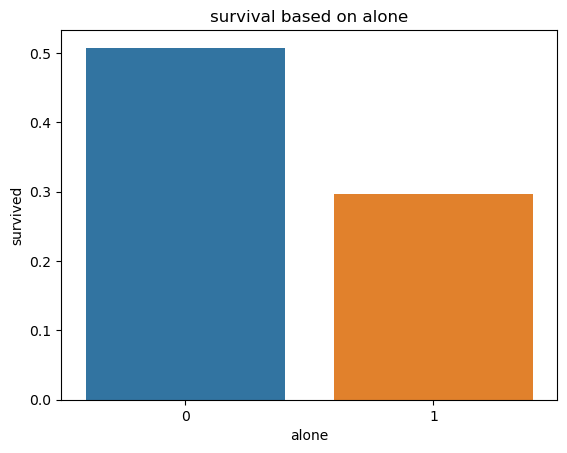

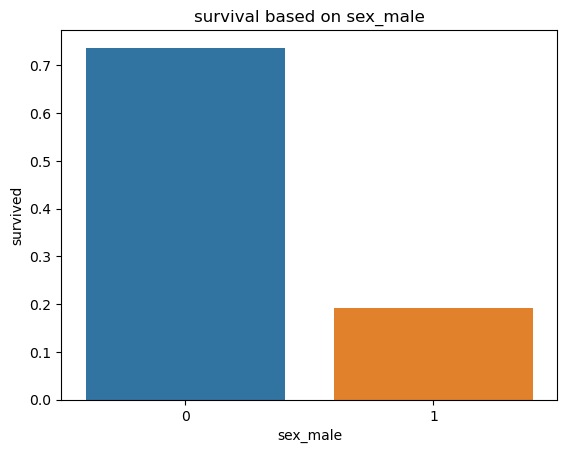

In [37]:

for col in cat_cols:
    if col != 'survived':
        sns.barplot(data=train_titanic,x=col, y='survived',ci=False)
        plt.title(f'survival based on {col}')
        plt.show()

In [ ]:
# takeaways here:
# looks like 1st 2nd class pax survived better...as did women...and those with 1 sibsp

In [ ]:
# Is survival diff across sibsp Chi-2

H$_o$:  No proportional diff exists in survival based upon sibsp

H$_a$: There is a proportional diff in the dist of sibsp to survival

In [40]:
def bin_vals():
    if val == 0:
        return 0
    elif val == 1:
        return 1
    else:
        return 2

In [42]:
train_titanic['sibsp'].apply(bin_vals)

TypeError: bin_vals() takes 0 positional arguments but 1 was given

In [ ]:
train_titanic['sibsp_custom']

In [ ]:
# what if we interepret sibsp as a continuous value?  T-test

In [38]:
train_titanic['sibsp'].value_counts()

0    332
1    126
2     18
4      9
3      7
5      4
8      2
Name: sibsp, dtype: int64

H$_o$:  No proportional diff exists in survival based upon mean of sibsp

H$_a$: There is a proportional diff mean of sibsp  relative to survival

In [43]:
survived_sibsp = train_titanic[train_titanic.survived==1].sibsp
died_sibsp = train_titanic[train_titanic.survived==0].sibsp

In [44]:
stats.ttest_ind(survived_sibsp,died_sibsp)

Ttest_indResult(statistic=-0.7146905346763539, pvalue=0.4751365163551704)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


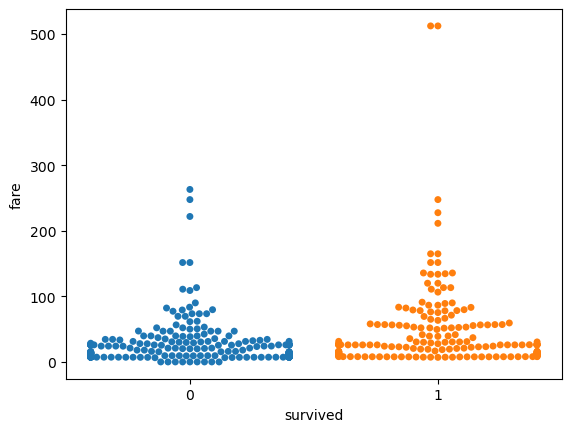

In [48]:
# continuous variables
sns.swarmplot(data=train_titanic,x='survived',y='fare')
plt.show()

In [ ]:
# fare is continous t-test time mann-whitney

H$_o$:  No diff exists in means of fare and survival 

H$_a$: Diff exists in the means of fare to survival

In [49]:
survived_fares = train_titanic[train_titanic.survived ==1].fare
died_fares = train_titanic[train_titanic.survived ==0].fare

In [51]:
stat, p = stats.mannwhitneyu(survived_fares, died_fares)
stat, p

(40615.5, 4.611807414857279e-13)

### Multivariate

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


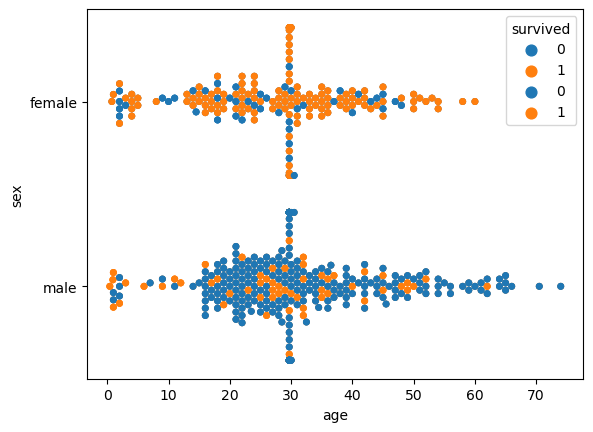

In [54]:
sns.swarmplot(data=train_titanic,x='age',y='sex',hue='survived')
plt.show()

In [56]:
train_titanic.sex.value_counts()

male      323
female    175
Name: sex, dtype: int64

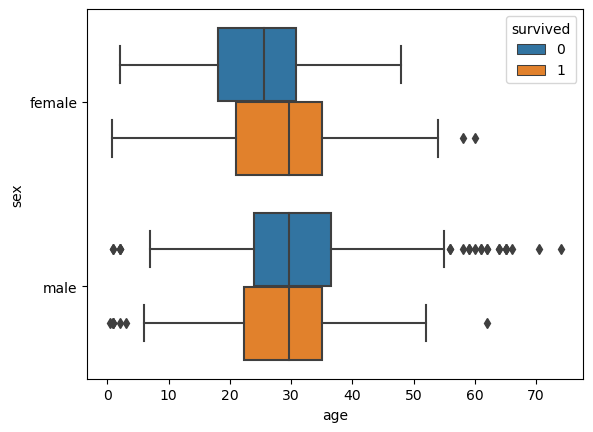

In [58]:
sns.boxplot(data=train_titanic,x='age',y='sex',hue='survived')
plt.show()

In [ ]:
'''
diff in age between women that survived and those that did not

'''

older_women vs younger_women:
is there a diff inmean age af these fgroups

H$_o$: The avg age of women who survived is less than or equal to than those who did not

H$_a$: The avg age of women who survived is greater than those who did not

In [60]:
train_titanic[(train_titanic.sex=='female') & (train_titanic.survived==1)] 

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
457,1,1,female,29.699118,1,0,51.8625,Southampton,0,0,0,1
208,1,3,female,16.000000,0,0,7.7500,Queenstown,1,0,1,0
537,1,1,female,30.000000,0,0,106.4250,Cherbourg,1,0,0,0
56,1,2,female,21.000000,0,0,10.5000,Southampton,1,0,0,1
85,1,3,female,33.000000,3,0,15.8500,Southampton,0,0,0,1
319,1,1,female,40.000000,1,1,134.5000,Cherbourg,0,0,0,0
556,1,1,female,48.000000,1,0,39.6000,Cherbourg,0,0,0,0
426,1,2,female,28.000000,1,0,26.0000,Southampton,0,0,0,1
431,1,3,female,29.699118,1,0,16.1000,Southampton,0,0,0,1
781,1,1,female,17.000000,1,0,57.0000,Southampton,0,0,0,1


In [68]:
alive_girls_age = train_titanic[(train_titanic.sex_male==0) & (train_titanic.survived==1)].age
dead_girls_age = train_titanic[(train_titanic.sex_male==0) & (train_titanic.survived==0)].age

In [69]:
# levene test for variance

stats.levene(alive_girls_age,dead_girls_age)

LeveneResult(statistic=0.17792715161223788, pvalue=0.6736843852950108)

In [70]:
tstat, p = stats.ttest_ind(alive_girls_age,dead_girls_age)
tstat,p

(1.4721531550143043, 0.14279638402038103)

In [ ]:
# MONDAY DEMO SOMETHING FROM TELCO!